#**Step 01: Install the dependencies**

In [ ]:
!nvidia-smi

Thu Aug  8 12:16:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install --upgrade ultralytics==8.2.67
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

#**Step 02: Mount GitHub to load processed data and save results**

In [ ]:
!git clone https://github.com/ajivishwam/ISL-Detection.git

Cloning into 'ISL-Detection'...
remote: Enumerating objects: 17338, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17338 (delta 0), reused 4 (delta 0), pack-reused 17333
Receiving objects: 100% (17338/17338), 492.96 MiB | 36.13 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (71665/71665), done.


#**Step 03: CLONING THE YOLO-V5 FILES FROM OFFICIAL REPOSITORY**

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.58 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (11545/11545), done.
/content/yolov5


#**Step 04: Install All the Required Packages of YOLOv5**

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
%cd yolov5

/content/yolov5


#**Step 05: Download the Pretrained Model Weights**

In [ ]:
import os
import urllib.request
#Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), 'weights')
os.makedirs(weights_dir, exist_ok = True)
#urls of the weights file
urls = ["https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5l.pt",
        "https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5m.pt",
        "https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5s.pt",
        "https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5x.pt"]

#Download each file
for url in urls:
  filename = os.path.basename(url)
  filepath = os.path.join(weights_dir, filename)
  urllib.request.urlretrieve(url, filepath)
  print(f"Downloaded: {filepath}")

Downloaded: /content/yolov5/weights/yolov5l.pt
Downloaded: /content/yolov5/weights/yolov5m.pt
Downloaded: /content/yolov5/weights/yolov5s.pt
Downloaded: /content/yolov5/weights/yolov5x.pt


#**Step 06: Train Custom Model with pre-trained weight of yolov5m**

In [ ]:
!rm -rf /content/yolov5/runs

### First run Model with 25 Epochs

In [ ]:
!python train.py --imgsz 256 --batch-size 8 --epochs 25 --data '/content/ISL-Detection/Data_20/data.yaml' --weights 'weights/yolov5m.pt' \
--optimizer AdamW --patience 0 --cos-lr --nosave --cache


2024-08-08 12:21:44.182573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 12:21:44.432337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 12:21:44.507728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=weights/yolov5m.pt, cfg=, data=/content/ISL-Detection/Data_20/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=8, imgsz=256, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

### Second Run Model with 50 Epochs

In [ ]:
!python train.py --imgsz 256 --batch-size 8 --epochs 50 --data '/content/drive/MyDrive/Colab Notebooks/Thesis-code/Data_20/data.yaml' --weights 'weights/yolov5m.pt' \
--optimizer AdamW --patience 10 --cos-lr --nosave --cache --name yolov5_custom


2024-07-31 15:56:15.769563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 15:56:15.769630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 15:56:15.771783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=weights/yolov5m.pt, cfg=, data=/content/drive/MyDrive/Colab Notebooks/Thesis-code/Data_20/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=256, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_we

##**Step 07: Save the Model best.pt weight to Drive or Download the file**

In [ ]:
import shutil

# Path where YOLOv5 saves the training results by default
default_save_path = '/content/yolov5/runs'

# Destination path in your Google Drive
destination_path = '/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov5/model-latest'

# Copy the entire directory
shutil.copytree(default_save_path, destination_path)

In [ ]:
import shutil

# Create a zip file
shutil.make_archive('results', 'zip', '/content/yolov5/runs')
# Download the zip file
from google.colab import files
files.download('/content/yolov5/results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Step 08: Examine Training Results**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
results_dir = '/content/yolov5/runs/train/exp'

In [ ]:
results_dir = '/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov5/model-latest/train/exp'

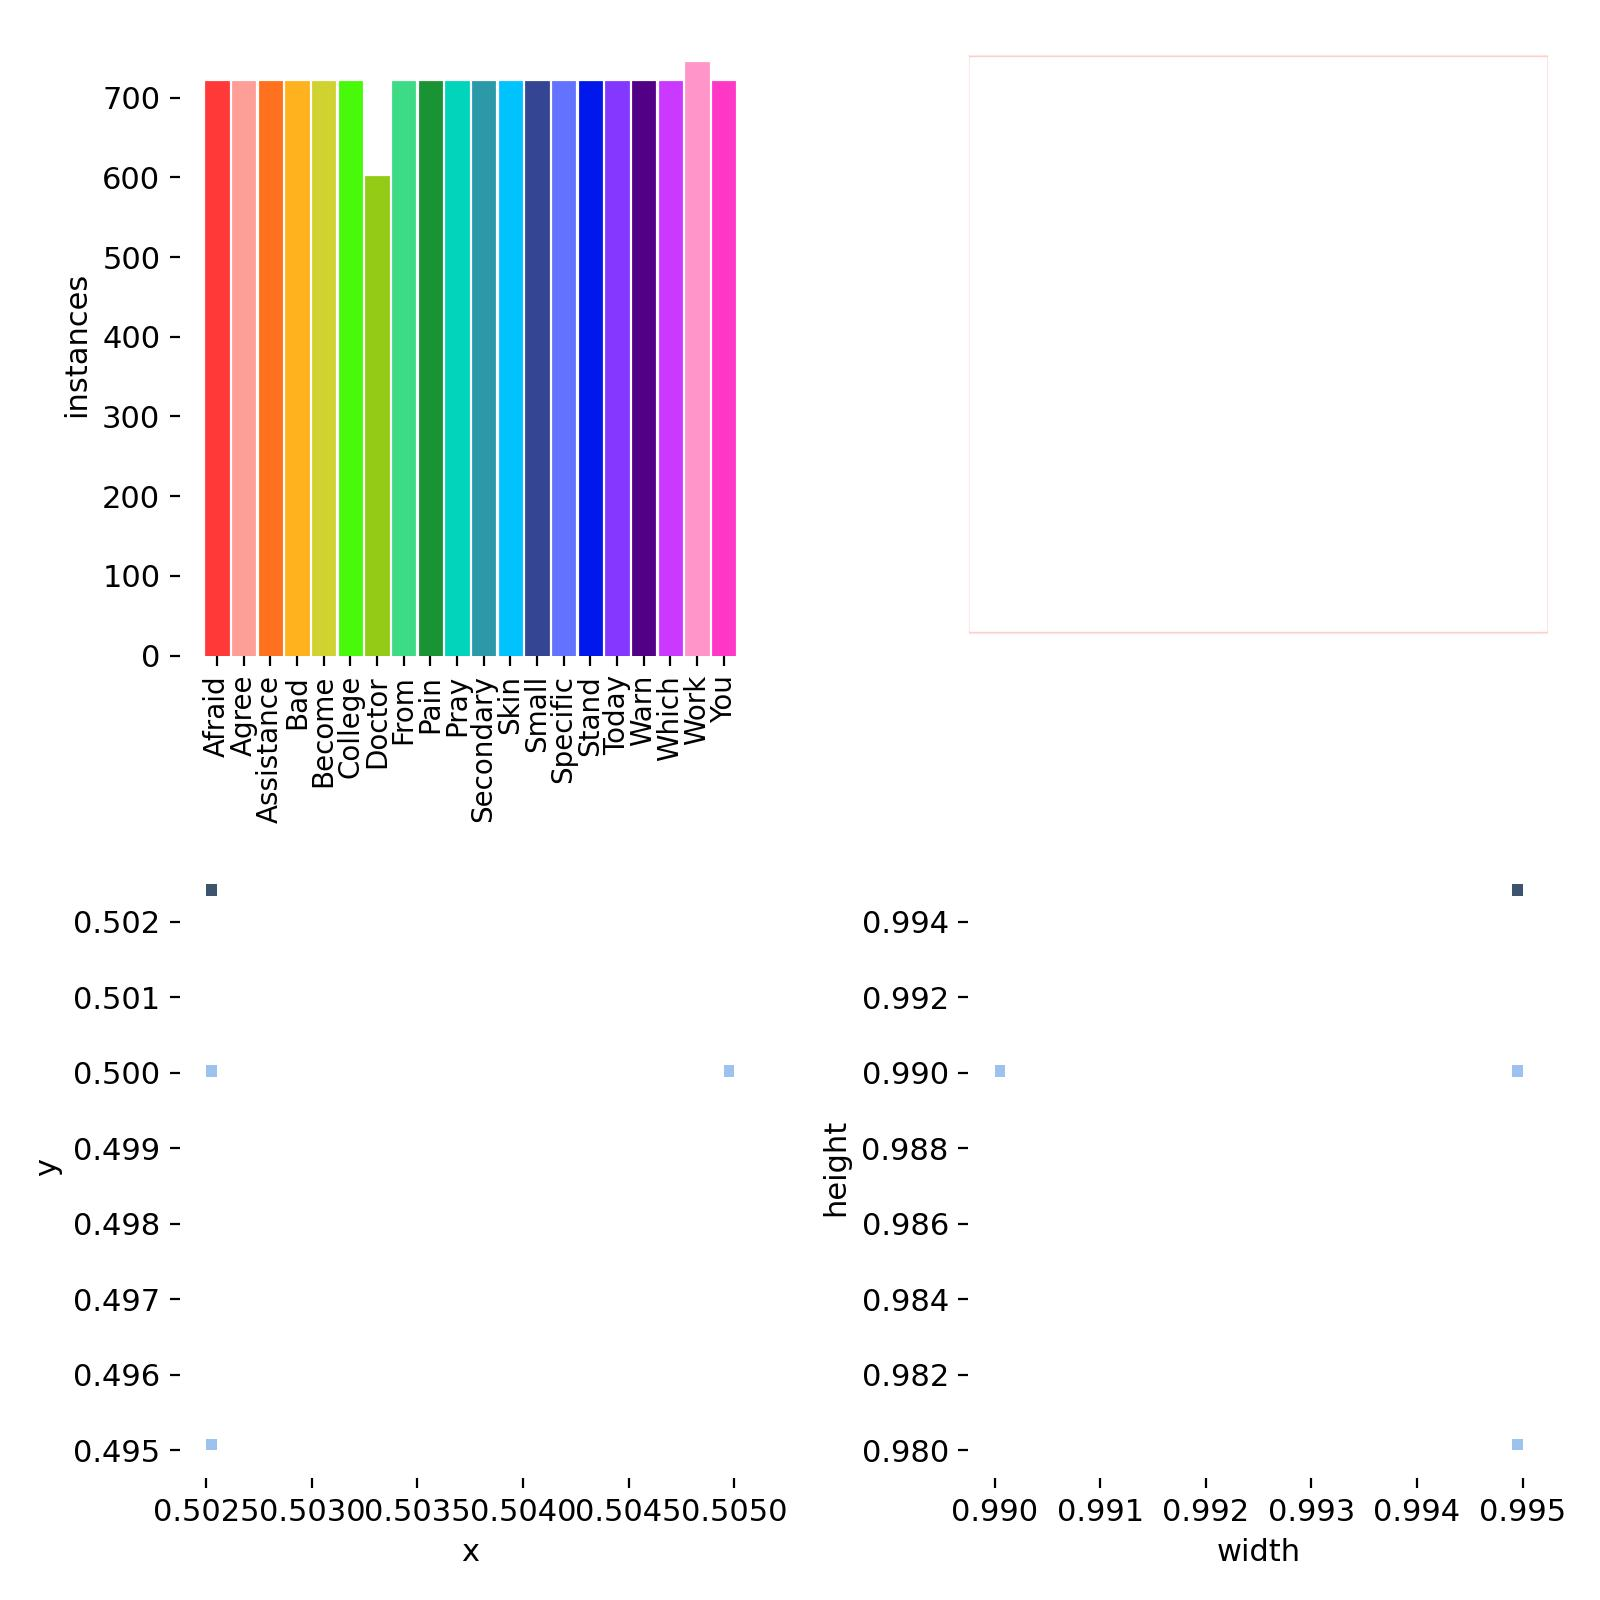

In [ ]:
from IPython.display import Image

Image(f"{results_dir}/labels.jpg")

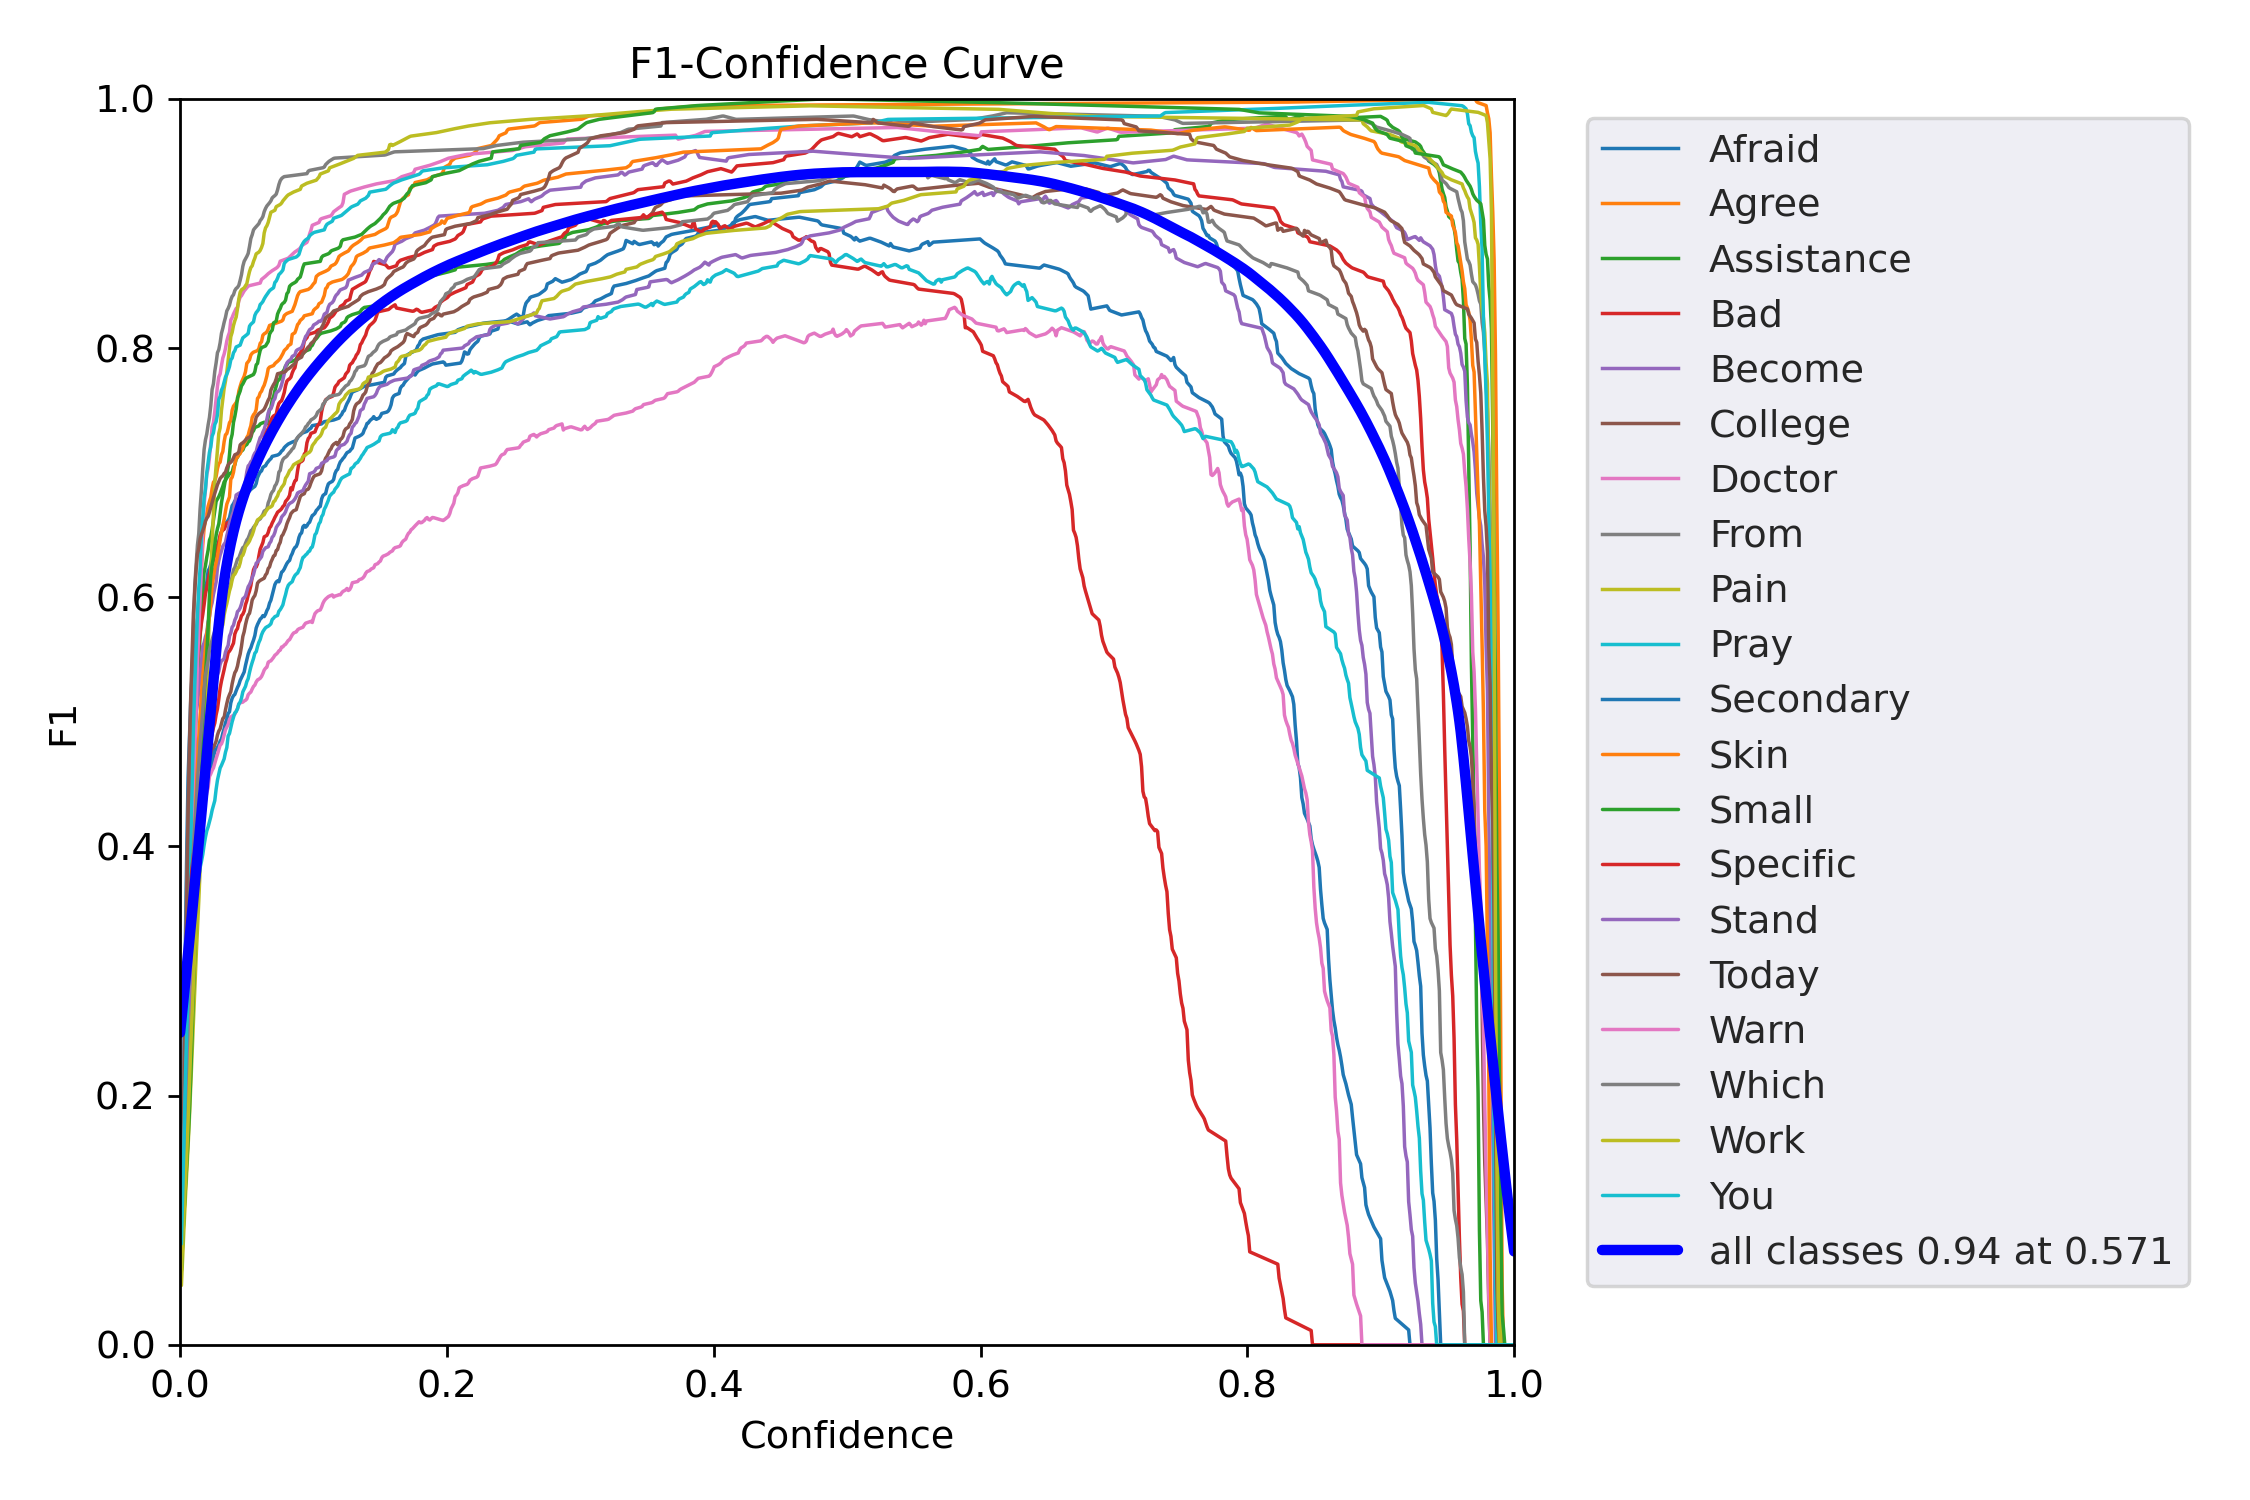

In [ ]:
from IPython.display import Image

Image(f"{results_dir}/F1_curve.png")

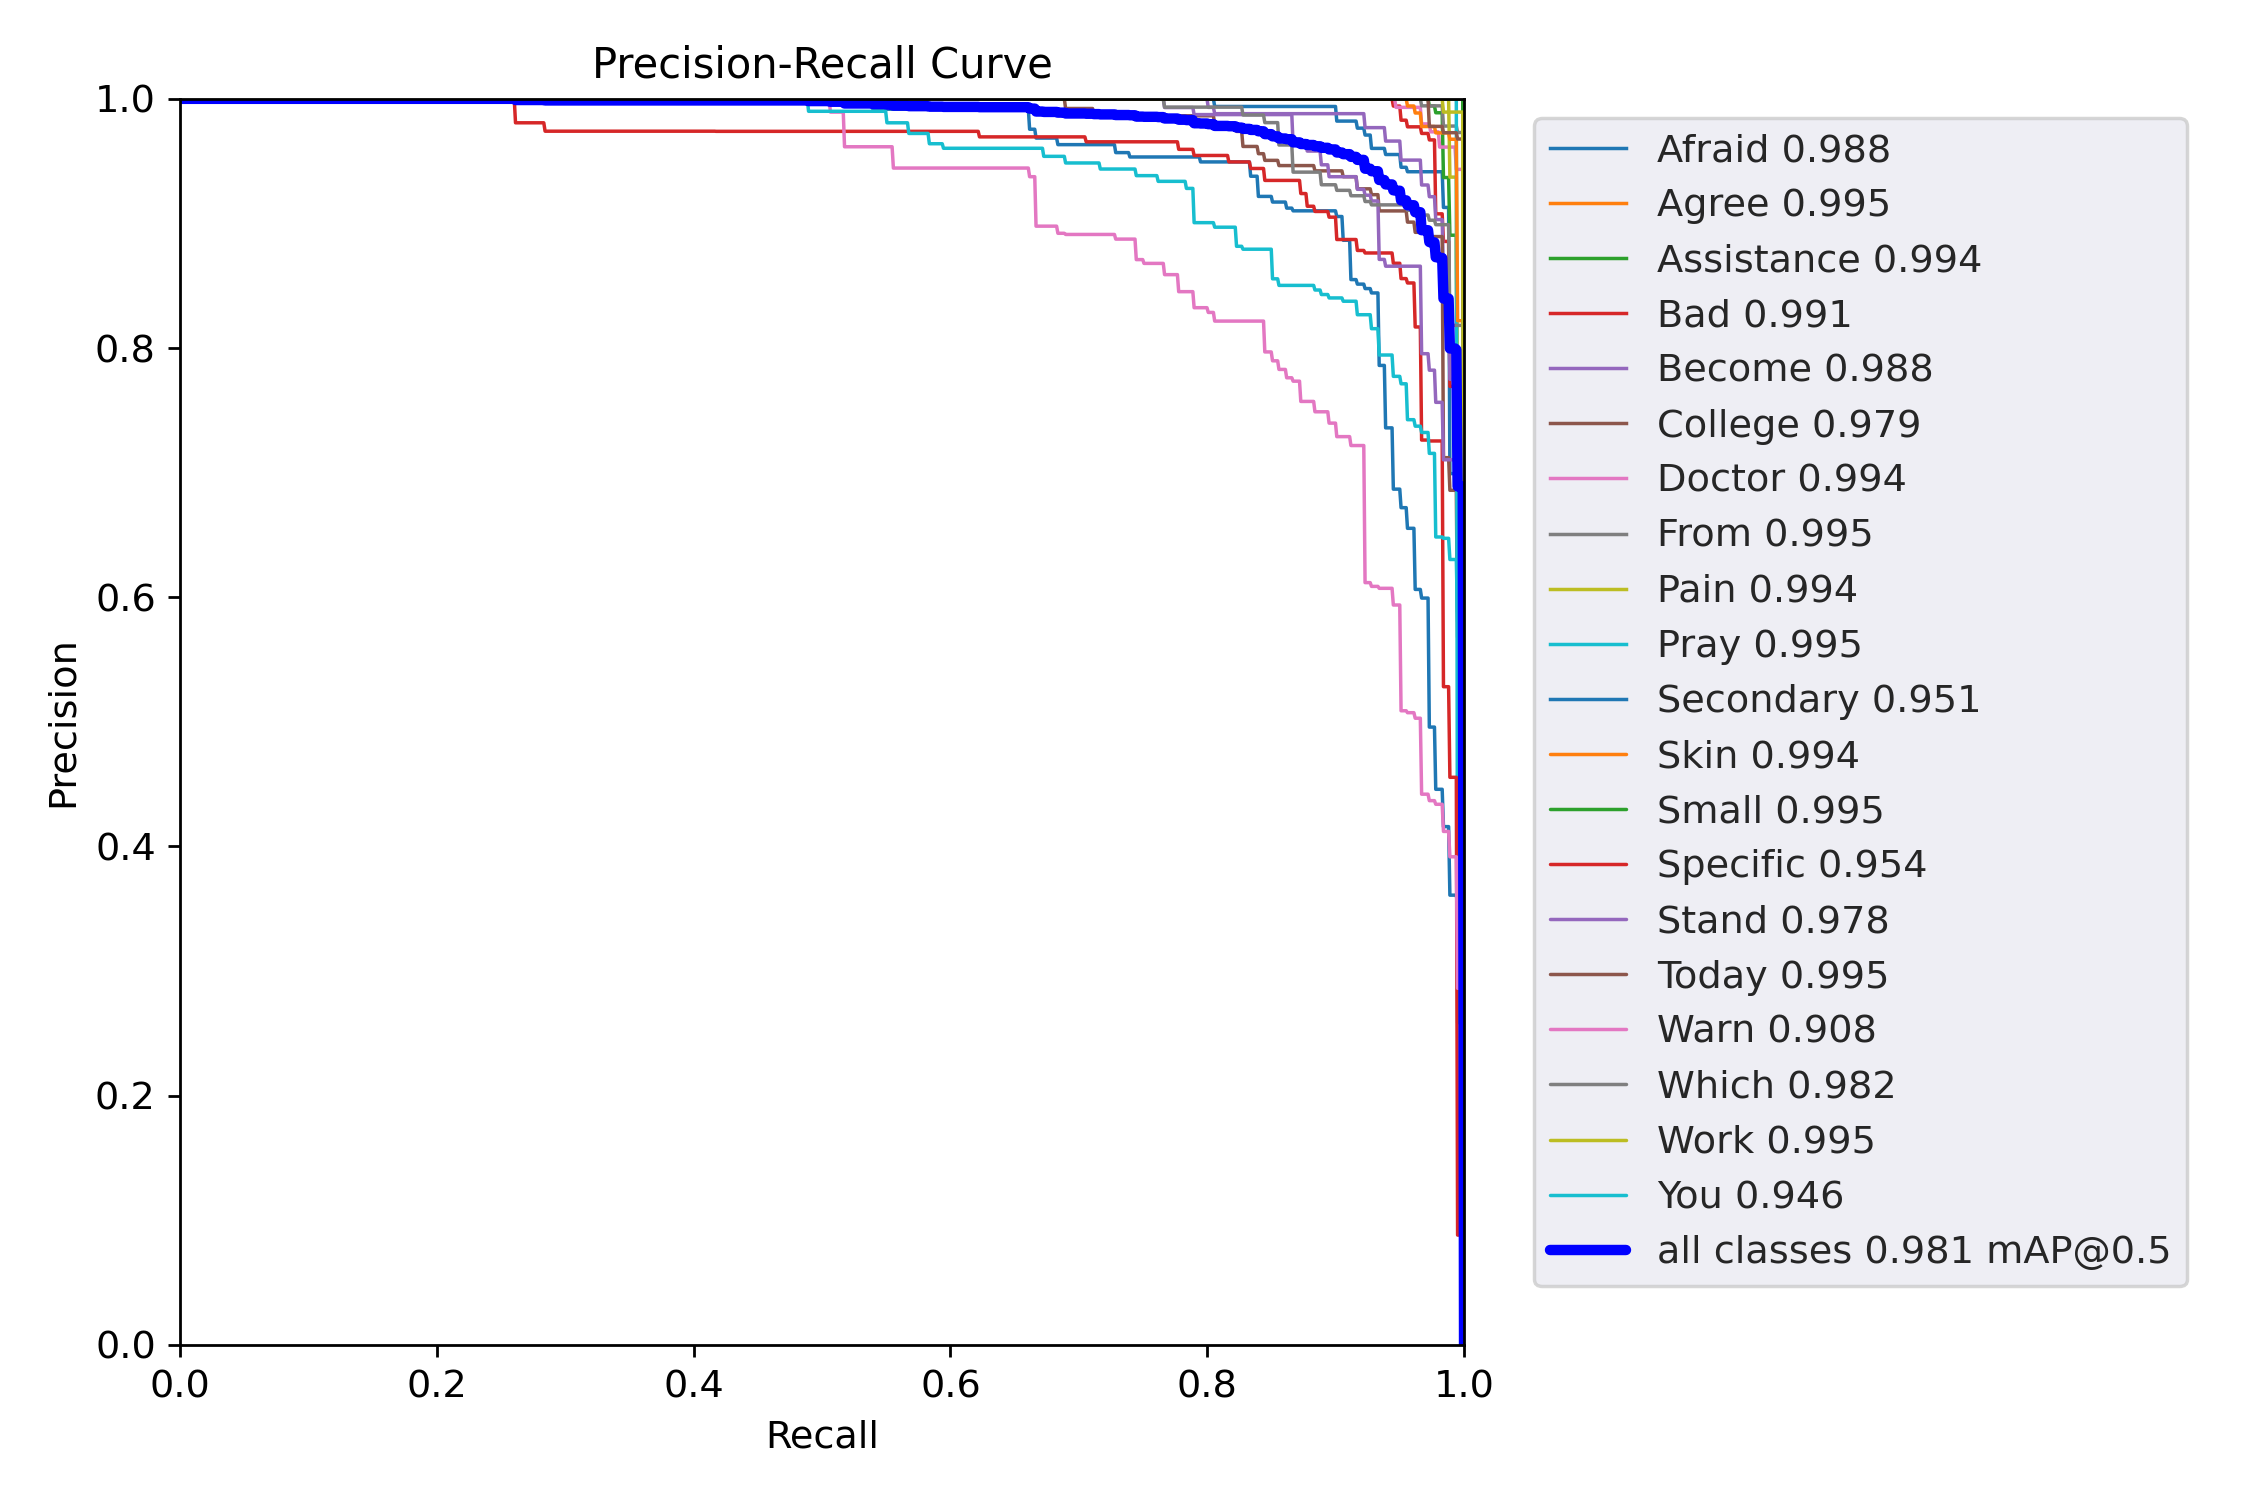

In [ ]:
from IPython.display import Image

Image(f"{results_dir}/PR_curve.png")

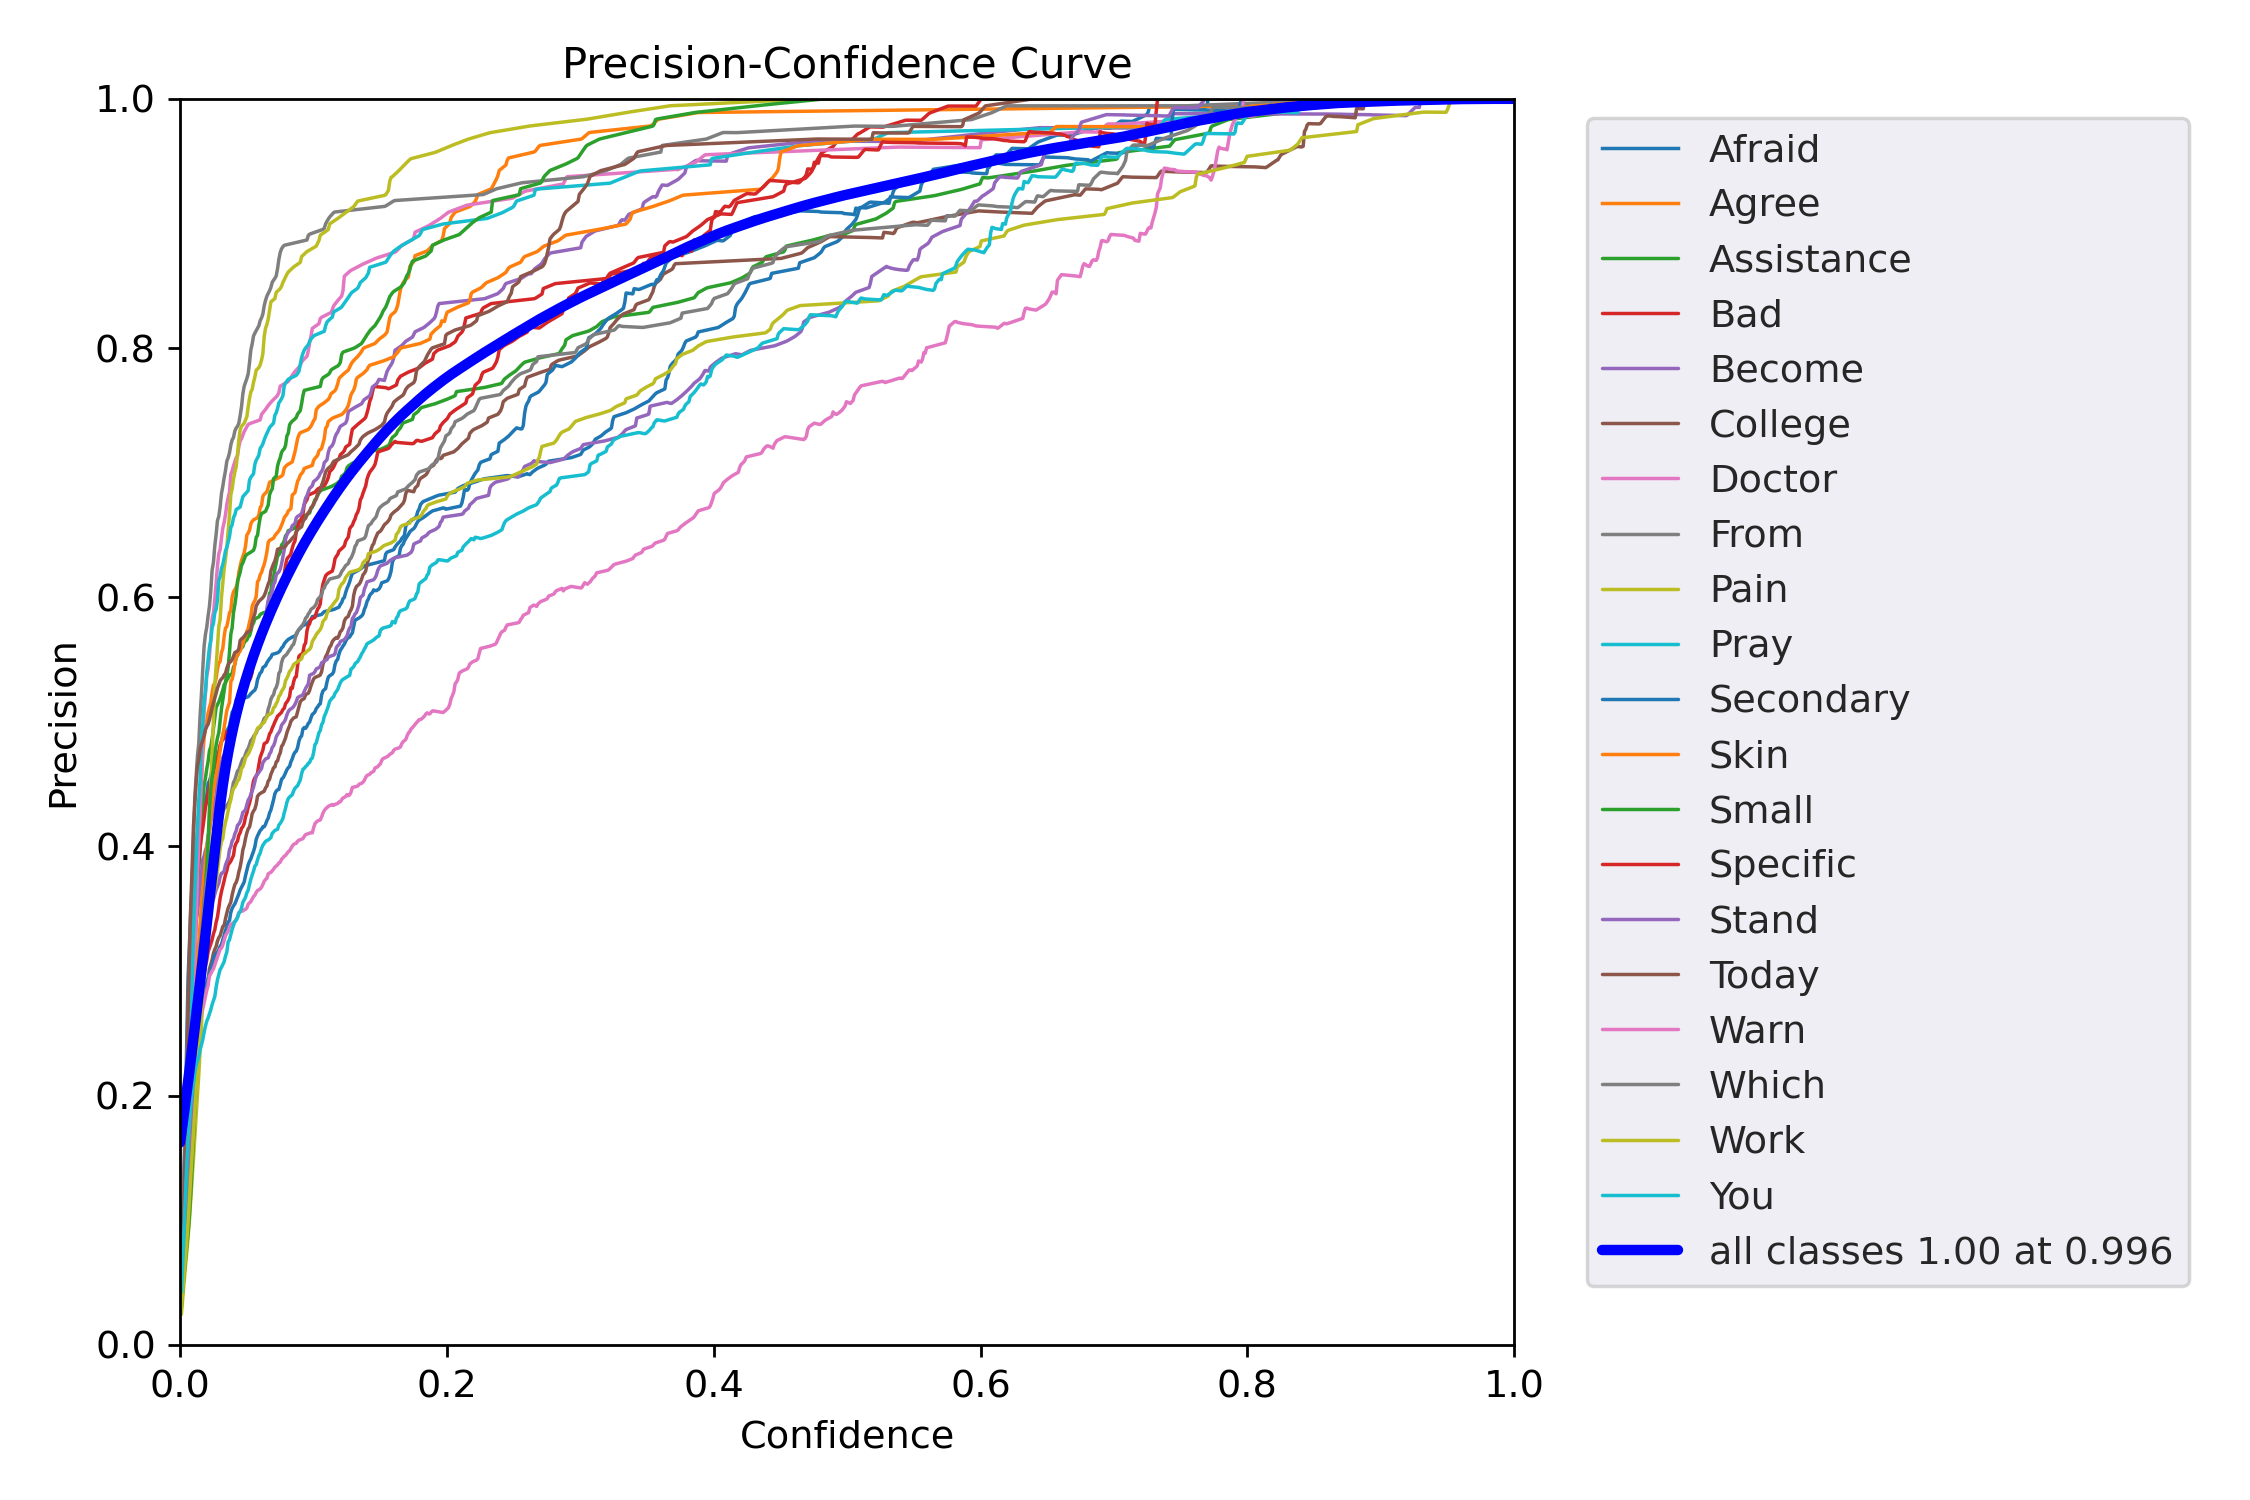

In [ ]:
from IPython.display import Image

Image(f"{results_dir}/P_curve.png")

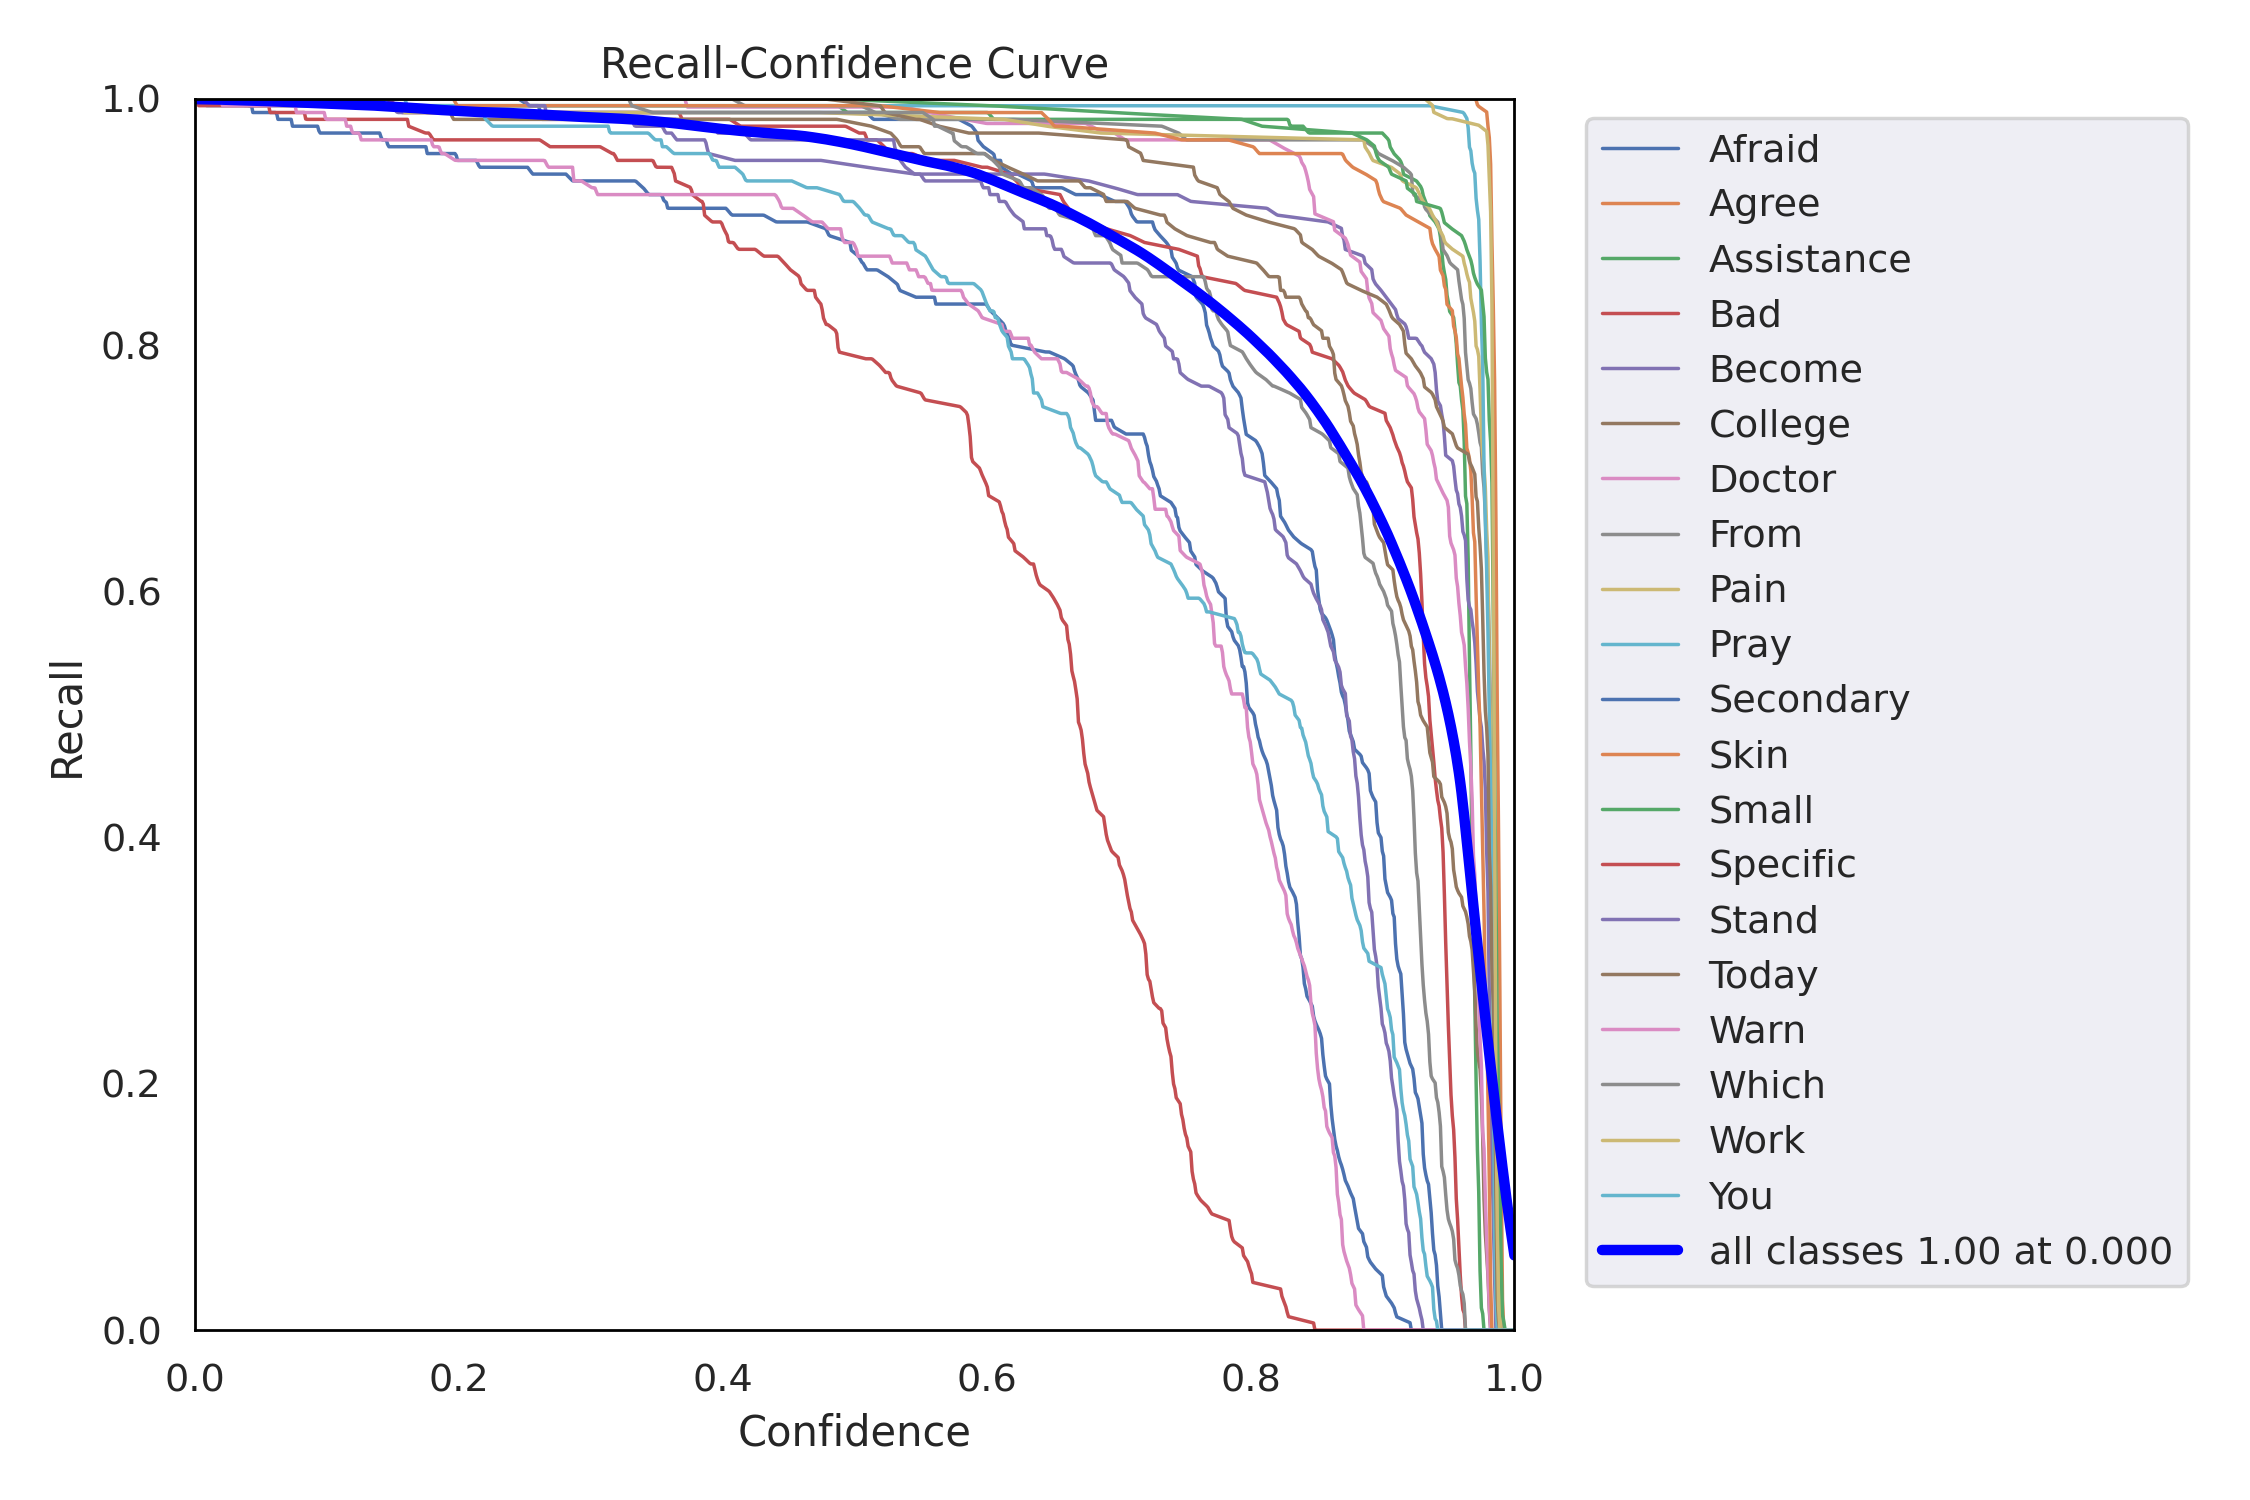

In [ ]:
from IPython.display import Image

Image(f"{results_dir}/R_curve.png")

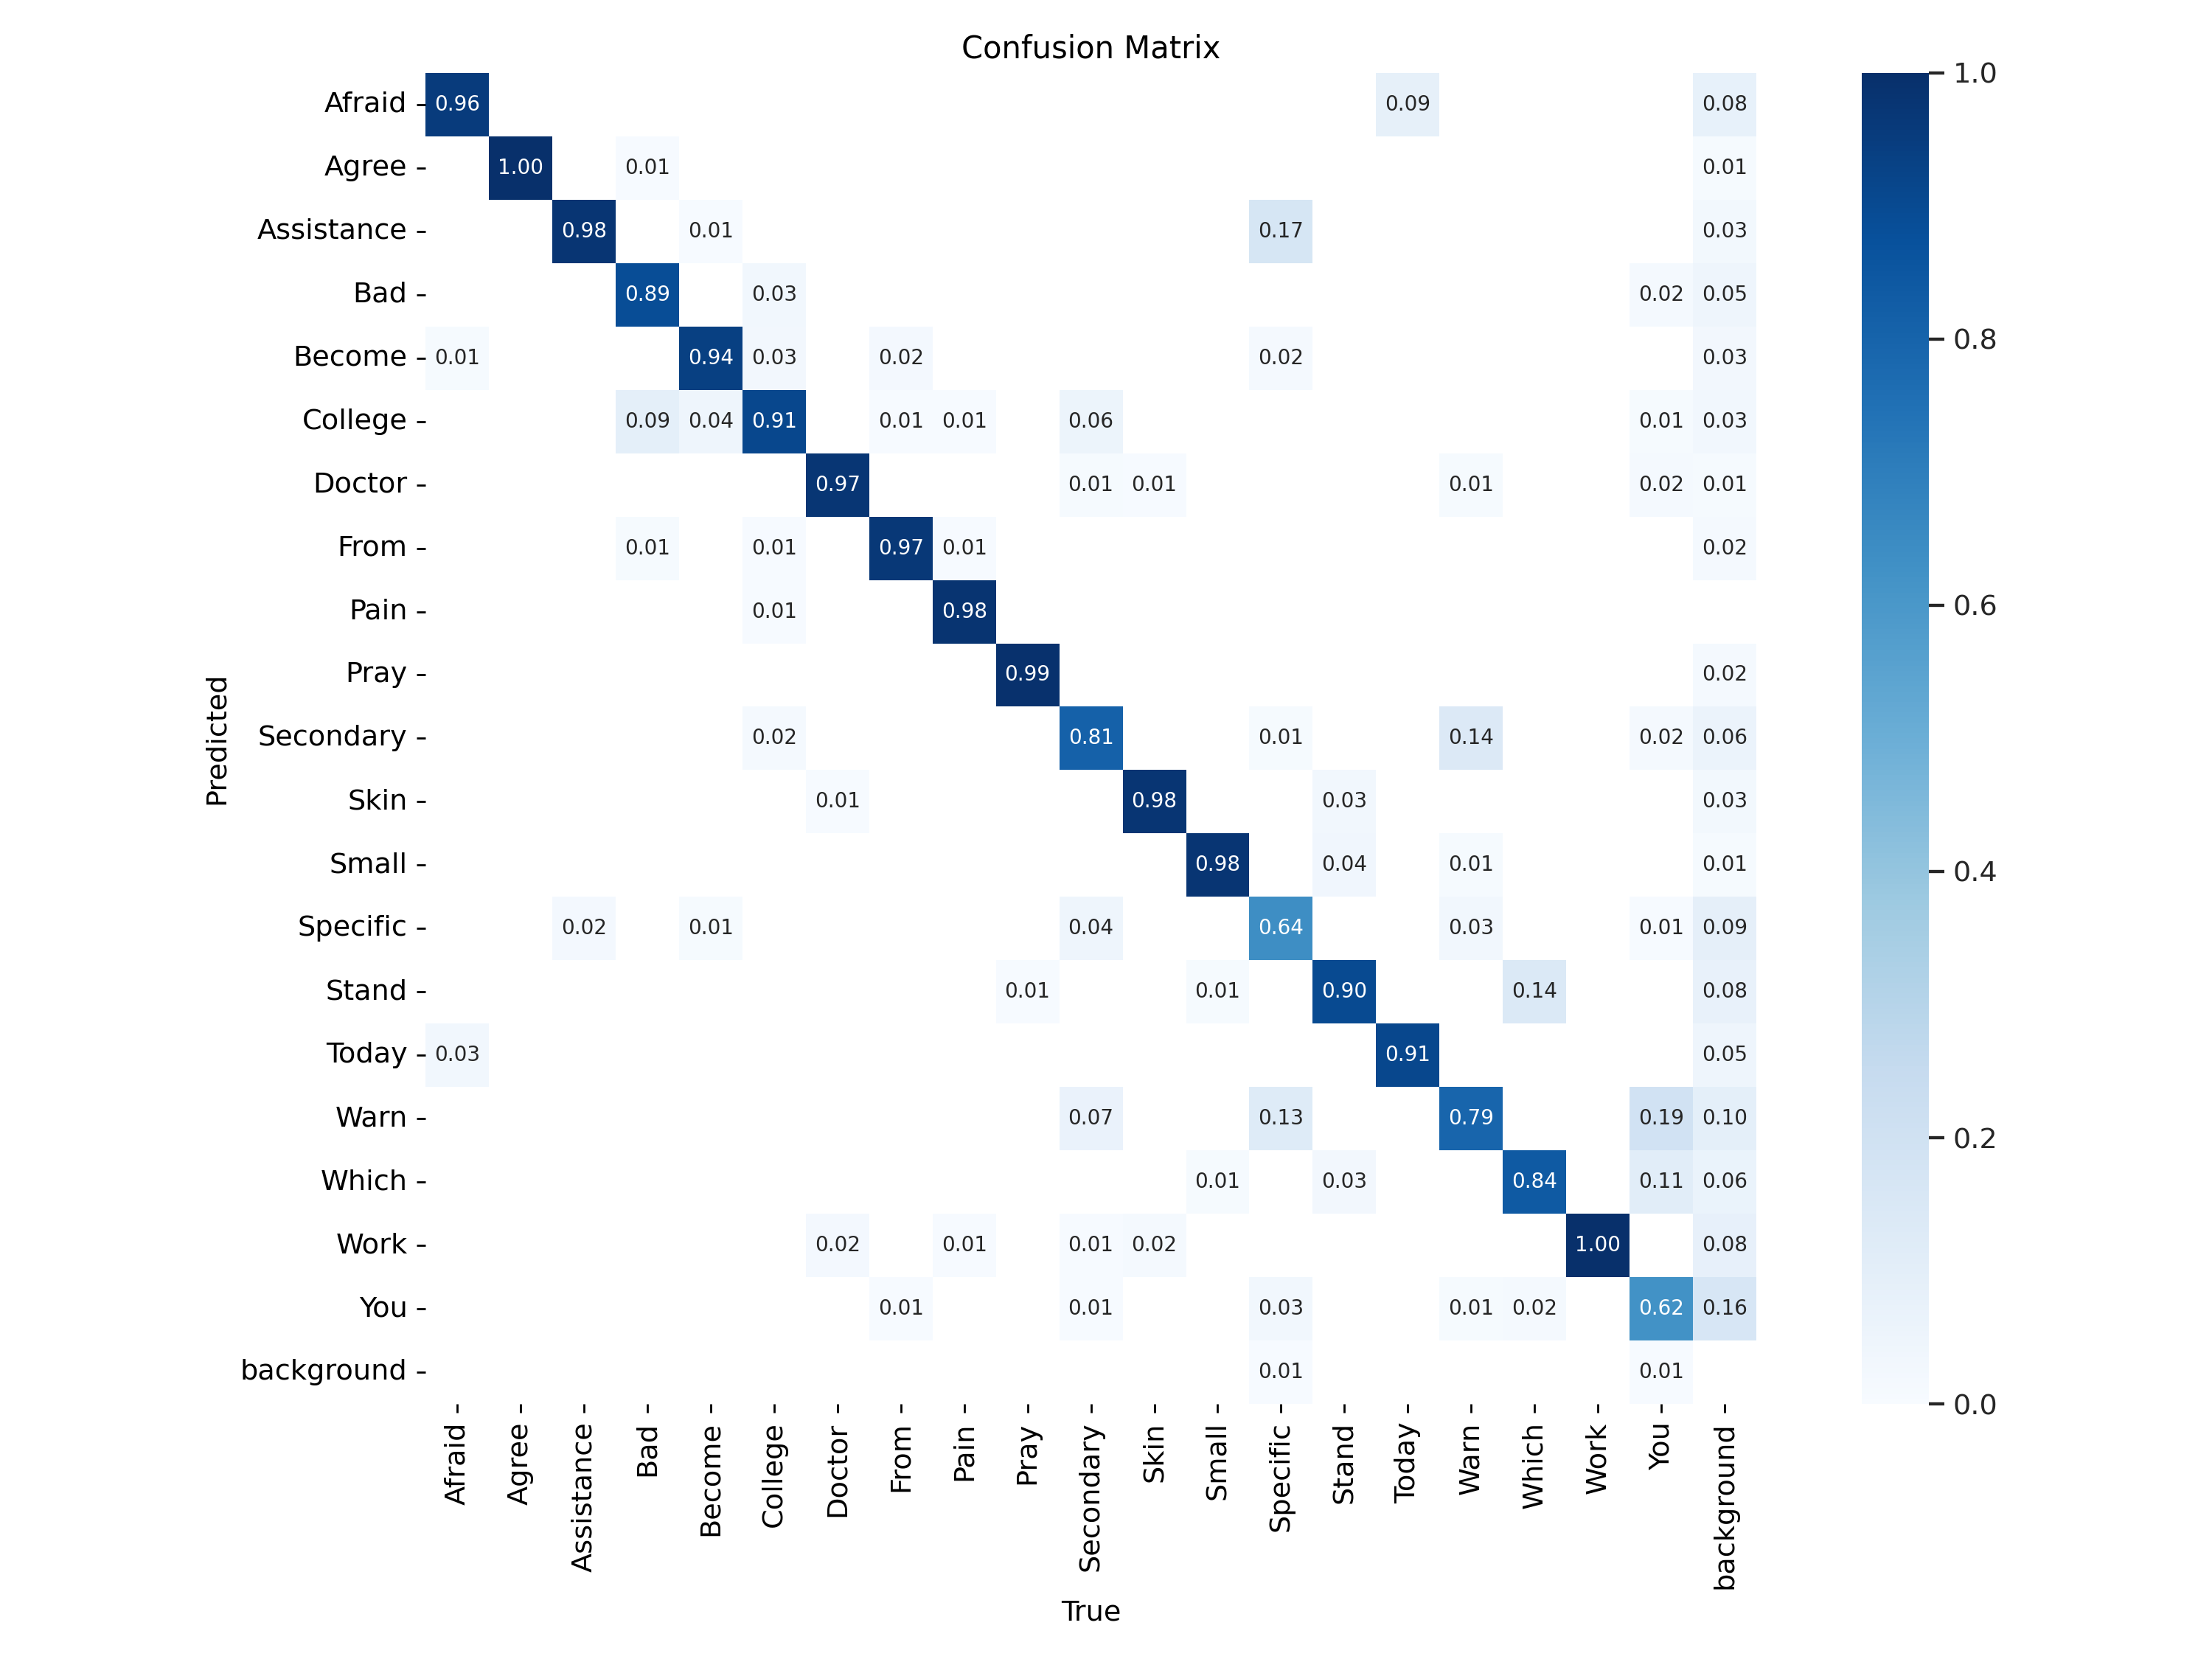

In [ ]:
Image(f"{results_dir}/confusion_matrix.png")

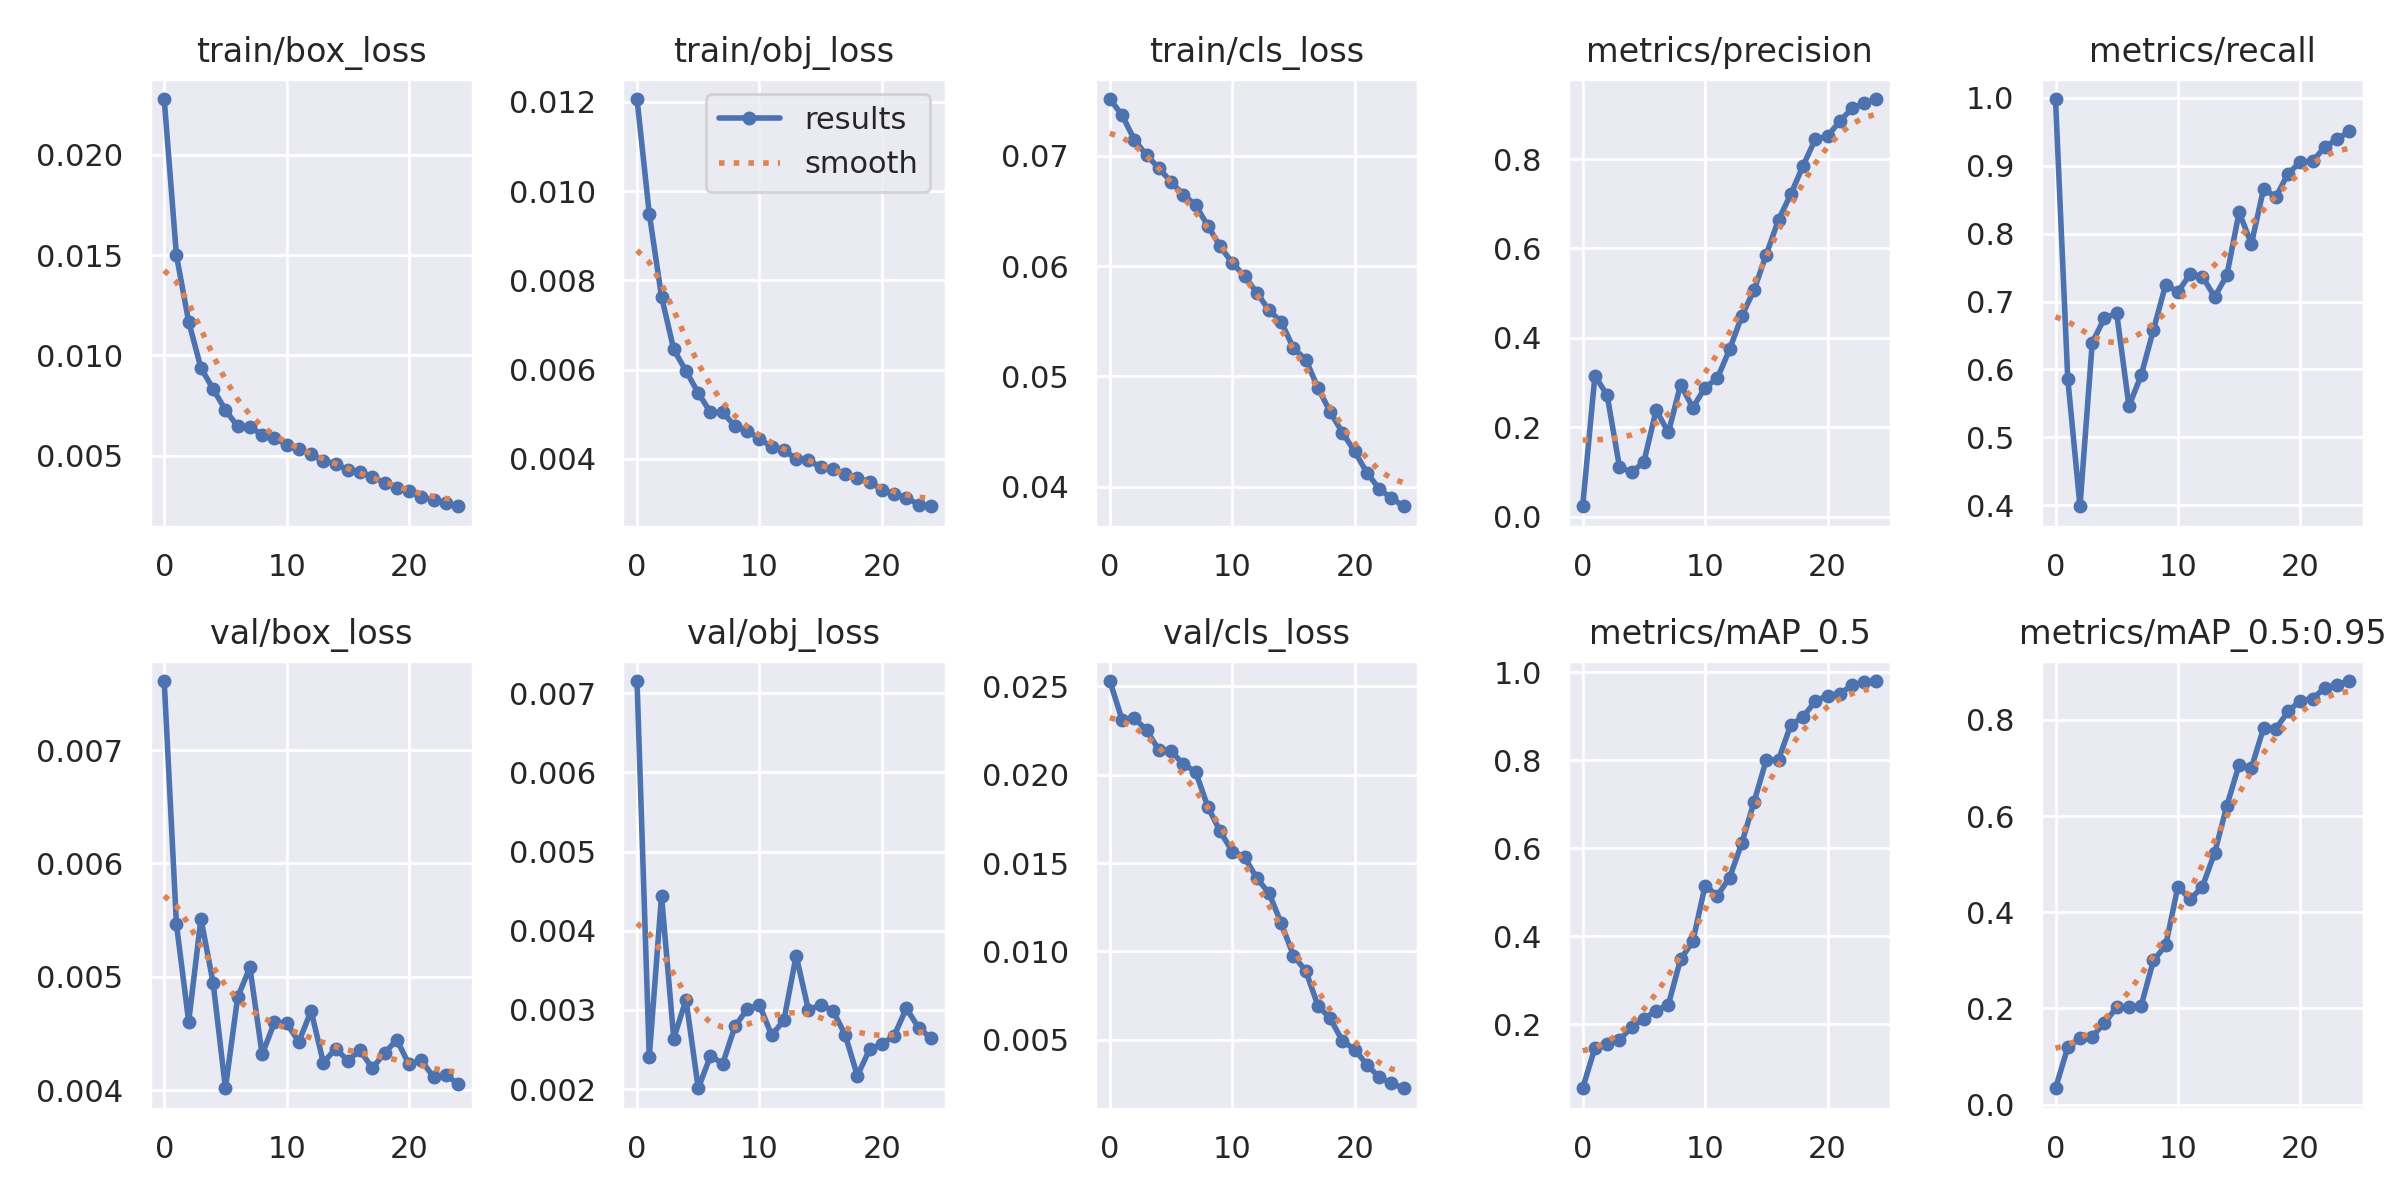

In [ ]:
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

# Display training results
Image(filename=f'{results_dir}/results.png')

## Training logs

In [ ]:
# Display the last few lines of the training log
log_file = f'{results_dir}/results.csv'

with open(log_file, 'r') as file:
    lines = file.readlines()
    for line in lines[-10:]:  # Display the last 10 lines
        print(line.strip())


15,           0.0042743,           0.0038135,            0.052545,             0.58632,             0.83188,              0.8012,             0.70714,           0.0042619,           0.0030643,            0.009754,           0.0041225,           0.0041225,           0.0041225
16,           0.0041893,           0.0037775,            0.051524,             0.66431,             0.78471,             0.80172,             0.69991,           0.0043505,           0.0029924,           0.0088983,           0.0035204,           0.0035204,           0.0035204
17,           0.0039493,           0.0036551,            0.048959,             0.72127,              0.8664,             0.88098,             0.78382,           0.0041943,           0.0026864,            0.006919,           0.0029424,           0.0029424,           0.0029424
18,           0.0036266,           0.0035781,            0.046769,             0.78459,             0.85383,             0.89832,              0.7817,           0.0043273, 

##**Step 09: Examine Inference Results**

In [ ]:
## Inference or detection on new images
!python detect.py --source '/content/ISL-Detection/Data_20/images/test' \
--weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 640 --save-txt --save-conf


In [ ]:
## inference or detection on new images
!python detect.py --source '/content/test_images' --weights '/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov5/model-latest/train/exp/weights/best.pt' --img 640 --save-txt --save-conf


detect: weights=['/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov5/model-latest/train/exp/weights/best.pt'], source=/content/test_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs
image 1/45 /content/test_images/Image 1.jpeg: 640x640 1 From, 901.8ms
image 2/45 /content/test_images/Image 10.jpeg: 640x640 1 Bad, 1 Become, 1 College, 845.6ms
image 3/45 /content/test_images/Image 11.jpeg: 640x640 (no detections), 816.0ms
image 4/45 /content/test_images/Image 

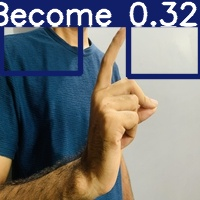

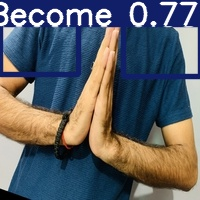

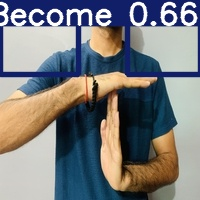

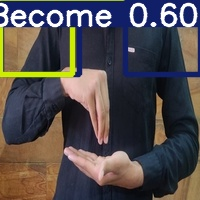

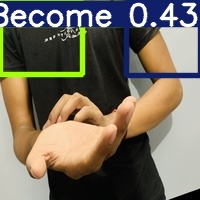

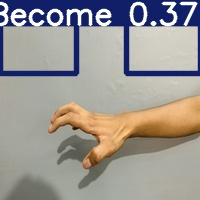

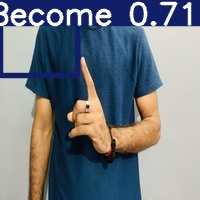

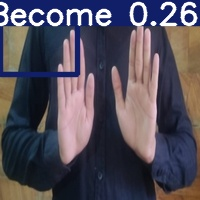

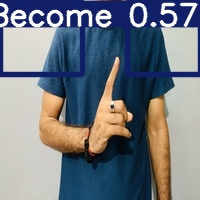

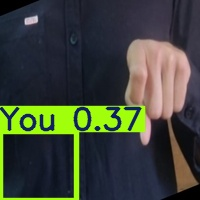

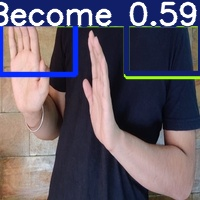

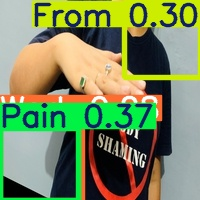

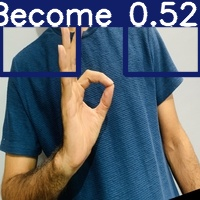

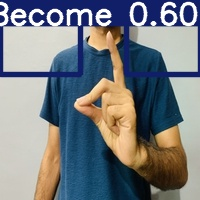

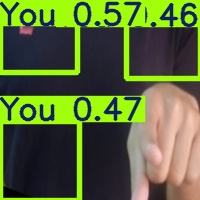

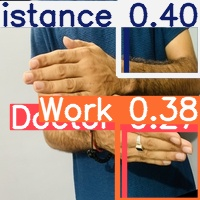

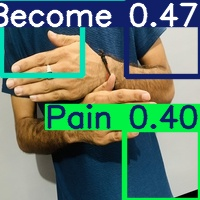

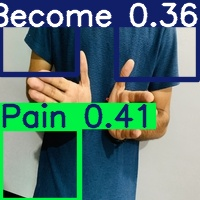

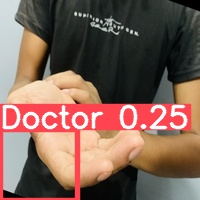

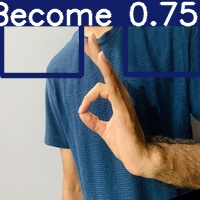

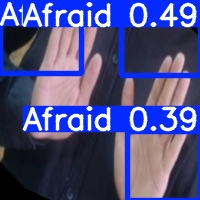

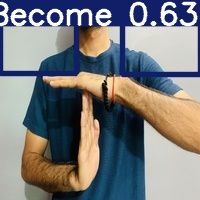

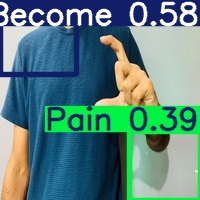

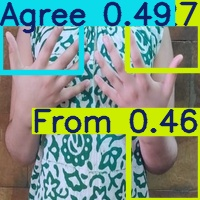

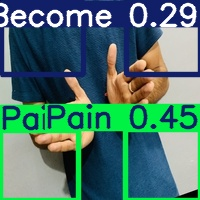

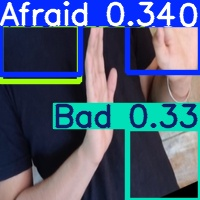

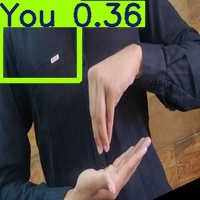

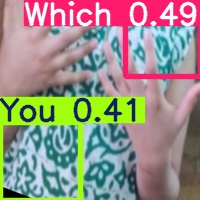

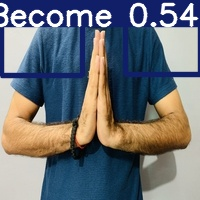

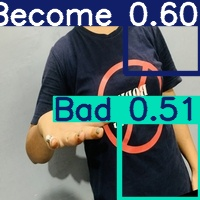

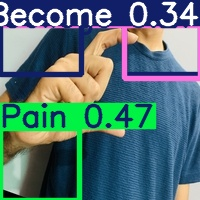

In [ ]:
# Display result images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*jpg'):
    display(Image(filename=imageName))
    print("\n")

##**Step 10: Display Metrics**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

res_path = f"{results_dir}/results.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(res_path)

# Remove spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows
print(df.head())

   epoch  train/box_loss  train/obj_loss  train/cls_loss  metrics/precision  \
0      0        0.022789        0.012066        0.075140           0.023079   
1      1        0.014988        0.009497        0.073686           0.315380   
2      2        0.011676        0.007639        0.071446           0.271230   
3      3        0.009377        0.006452        0.070047           0.111800   
4      4        0.008318        0.005971        0.068877           0.098870   

   metrics/recall  metrics/mAP_0.5  metrics/mAP_0.5:0.95  val/box_loss  \
0         0.99833         0.054225              0.033888      0.007609   
1         0.58659         0.146310              0.118900      0.005464   
2         0.39855         0.154730              0.137560      0.004605   
3         0.63935         0.164470              0.141310      0.005512   
4         0.67588         0.192940              0.169900      0.004945   

   val/obj_loss  val/cls_loss     x/lr0     x/lr1     x/lr2  
0      0.007153   

### Plot Training and Valiation Loss

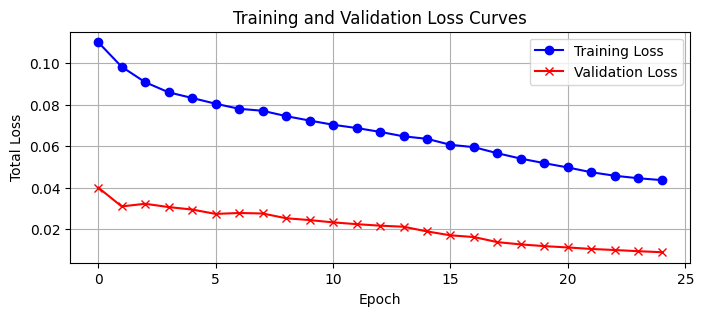

In [ ]:
import matplotlib.pyplot as plt

# Calculate total training and validation loss
df['Total_Train_Loss'] = df['train/box_loss'] + df['train/obj_loss'] + df['train/cls_loss']
df['Total_Val_Loss'] = df['val/box_loss'] + df['val/obj_loss'] + df['val/cls_loss']

# Plot training and validation loss curves
plt.figure(figsize=(8, 3))
plt.plot(df['epoch'], df['Total_Train_Loss'], label='Training Loss', color='blue', marker='o')
plt.plot(df['epoch'], df['Total_Val_Loss'], label='Validation Loss', color='red', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

### Plot Precision-Recall and mAP Curves

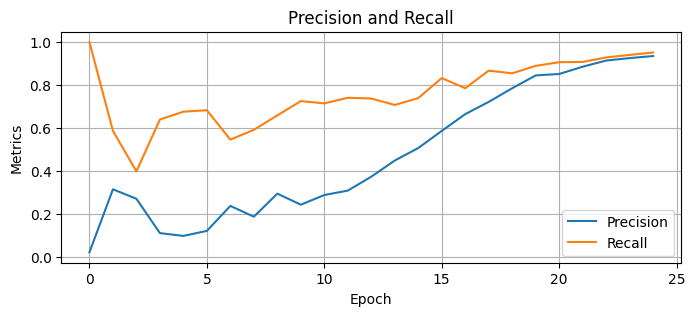

In [ ]:
# Plot precision, recall, and mAP over epochs
plt.figure(figsize=(8, 3))
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision and Recall')
plt.legend()
plt.grid(True)
plt.show()

### Mean Average Precision mAP@0.5 and mAP@0.5:0.95

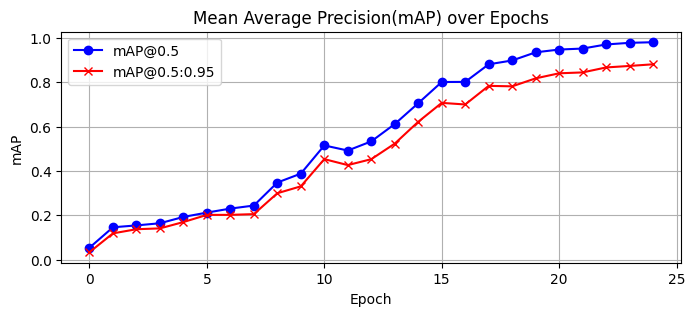

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5', color='b', marker='o')
plt.plot(df['epoch'], df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95', color='r', marker='x')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Mean Average Precision(mAP) over Epochs')
plt.grid(True)
plt.legend()
plt.show()

### Plot Learning Rate curve

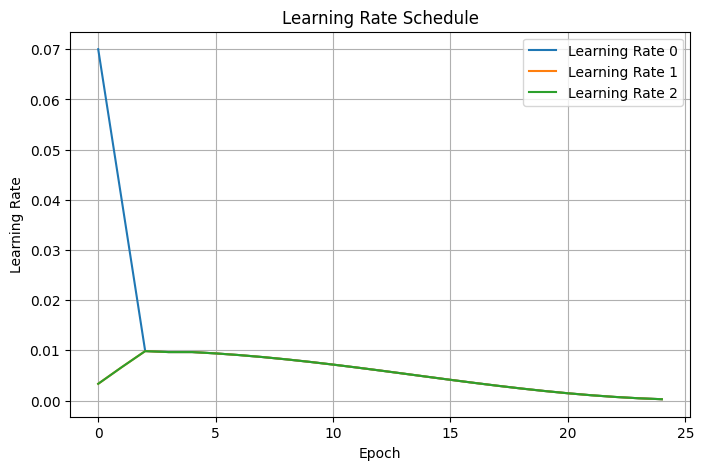

In [ ]:
# Plot learning rate schedule
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['x/lr0'], label='Learning Rate 0')
plt.plot(df['epoch'], df['x/lr1'], label='Learning Rate 1')
plt.plot(df['epoch'], df['x/lr2'], label='Learning Rate 2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid(True)
plt.show()